In [1]:
import string
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from patsy import dmatrices

from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Import data

In [2]:
# Create Taylor Swift Dataframe
taylor_df = pd.read_csv('./taylor_swift_IP.csv')
taylor_df.columns = ['unnamed', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity']

taylor_df['sonnet'] = taylor_df.apply(lambda x: 0, axis=1)

# unnecessary columns

taylor_df = taylor_df.drop('unnamed', axis=1)

taylor_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,1,11,stress,stress,stress,stress,stress,unstress,stress,stress,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,22,11,stress,stress,stress,stress,stress,stress,stress,stress,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,26,11,stress,stress,stress,stress,unstress,stress,stress,unstress,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0
3,35,11,stress,stress,stress,stress,stress,stress,stress,stress,unstress,unstress,stress,missing,"['He', 'says', 'he', 'so', 'in', 'love', 'he',...",35,taylor_swift,0.250000,0.800000,0
4,46,11,stress,stress,stress,stress,unstress,stress,stress,stress,stress,stress,stress,missing,"['So', 'I', 'drive', 'home', 'alone', 'as', 'I...",46,taylor_swift,0.000000,0.000000,0


In [3]:
taylor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 20 columns):
sonnet_index    470 non-null int64
syllables       470 non-null int64
s1              470 non-null object
s2              470 non-null object
s3              470 non-null object
s4              470 non-null object
s5              470 non-null object
s6              470 non-null object
s7              470 non-null object
s8              470 non-null object
s9              470 non-null object
s10             470 non-null object
s11             470 non-null object
s12             470 non-null object
word_list       470 non-null object
sonnet_num      470 non-null int64
author          470 non-null object
polarity        470 non-null float64
subjectivity    470 non-null float64
sonnet          470 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 73.5+ KB


In [4]:
# Create BSB Dataframe
bsb_df = pd.read_csv('./bsb_IP.csv')
bsb_df.columns = ['unnamed', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity']

bsb_df['sonnet'] = bsb_df.apply(lambda x: 0, axis=1)

# unnecessary columns

bsb_df = bsb_df.drop('unnamed', axis=1)

bsb_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,11,stress,stress,stress,unstress,stress,unstress,unstress,stress,stress,stress,stress,missing,"['Your', 'ten', 'thousand', 'promises', 'That'...",0,bsb,0.0,0.0,0
1,8,11,stress,stress,unstress,stress,stress,stress,stress,unstress,stress,stress,stress,missing,"['Who', 'wasted', 'my', 'time', 'and', 'money'...",8,bsb,-0.2,0.0,0
2,24,11,stress,stress,stress,unstress,stress,unstress,unstress,stress,stress,stress,stress,missing,"['Your', 'ten', 'thousand', 'promises', 'That'...",24,bsb,0.0,0.0,0
3,27,11,stress,stress,stress,unstress,stress,unstress,unstress,stress,stress,stress,stress,missing,"['Your', 'ten', 'thousand', 'promises', 'That'...",27,bsb,0.0,0.0,0
4,28,11,stress,stress,stress,missing,stress,missing,stress,stress,stress,missing,stress,missing,"['What', 'a', 'lie', '(what', 'a', 'lie)', 'Yo...",28,bsb,0.0,0.0,0


In [5]:
bsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 20 columns):
sonnet_index    1235 non-null int64
syllables       1235 non-null int64
s1              1235 non-null object
s2              1235 non-null object
s3              1235 non-null object
s4              1235 non-null object
s5              1235 non-null object
s6              1235 non-null object
s7              1235 non-null object
s8              1235 non-null object
s9              1235 non-null object
s10             1235 non-null object
s11             1235 non-null object
s12             1235 non-null object
word_list       1235 non-null object
sonnet_num      1235 non-null int64
author          1235 non-null object
polarity        1235 non-null float64
subjectivity    1235 non-null float64
sonnet          1235 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 193.0+ KB


In [6]:
# Create full_sonnet Dataframe
poems_df = pd.read_csv('./full_sonnet_df.csv')
poems_df.head()
poems_df.columns = ['unnamed0','unnamed1', 'sonnet_index', 'syllables', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       'word_list', 'sonnet_num', 'author', 'polarity', 'subjectivity','sonnet']

# drop unnecessary columns

poems_df = poems_df.drop('unnamed0', axis=1)
poems_df = poems_df.drop('unnamed1', axis=1)

poems_df.head()

,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,2,10,unstress,stress,unstress,stress,unstress,stress,unstress,stress,unstress,stress,missing,missing,"['From', 'fairest', 'creatures', 'we', 'desire...",1,Shakespeare,0.00,0.00,1
1,3,11,unstress,stress,stress,stress,unstress,stress,stress,stress,unstress,stress,missing,missing,"['That', 'thereby', 'beauty', 'rose', 'might',...",1,Shakespeare,0.60,0.95,1
2,4,10,stress,stress,unstress,missing,missing,stress,stress,stress,unstress,stress,missing,missing,"['But', 'as', 'the', 'riper', 'should', 'by', ...",1,Shakespeare,0.00,0.00,1
3,5,10,unstress,stress,unstress,stress,stress,stress,unstress,stress,unstress,unstress,missing,missing,"['His', 'tender', 'heir', 'might', 'bear', 'hi...",1,Shakespeare,0.00,0.00,1
4,6,10,stress,stress,stress,unstress,unstress,stress,stress,stress,stress,stress,missing,missing,"['But', 'thou', 'contracted', 'to', 'thine', '...",1,Shakespeare,0.65,0.90,1


In [7]:
# Randomly take subset of the full sonnets data
poems_df = poems_df.drop(poems_df.sample(frac=.65).index)

In [8]:
poems_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 5115
Data columns (total 20 columns):
sonnet_index    1792 non-null int64
syllables       1792 non-null int64
s1              1792 non-null object
s2              1792 non-null object
s3              1792 non-null object
s4              1792 non-null object
s5              1792 non-null object
s6              1792 non-null object
s7              1792 non-null object
s8              1792 non-null object
s9              1792 non-null object
s10             1792 non-null object
s11             1792 non-null object
s12             1792 non-null object
word_list       1792 non-null object
sonnet_num      1792 non-null int64
author          1768 non-null object
polarity        1792 non-null float64
subjectivity    1792 non-null float64
sonnet          1792 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 294.0+ KB


In [9]:
# Stacking the Taylor Swift, BSB, and Poems dataframes

final_df = pd.concat([taylor_df, bsb_df, poems_df])
final_df.head()
final_df.to_csv('final_df.csv')

In [10]:
final_df.shape

(3497, 20)

# Check correlation

In [11]:
final_df.drop("sonnet_index",axis=1).corr()

,syllables,sonnet_num,polarity,subjectivity,sonnet
syllables,1.000000,0.439825,-0.043094,-0.061983,-0.611566
sonnet_num,0.439825,1.000000,-0.077097,-0.064887,-0.727103
polarity,-0.043094,-0.077097,1.000000,0.218598,0.080197
subjectivity,-0.061983,-0.064887,0.218598,1.000000,0.103596
sonnet,-0.611566,-0.727103,0.080197,0.103596,1.000000


# Baseline

In [12]:
print(np.mean(final_df.sonnet))

0.5124392336288247


# Logistic Regression

In [13]:
logreg = LogisticRegression()

formula = 'sonnet ~ syllables + C(s1) + C(s2) + C(s3) + C(s4) + C(s5) + C(s6) + C(s7) + C(s8) + C(s9) + C(s10) + C(s11) + C(s12) + polarity + subjectivity -1'
Y, X = dmatrices(formula, data=final_df)

In [14]:
#Prediction values
# ypred = logreg.predict(X)
# mistakes_df['algorithm'] = ypred

In [15]:
interaction_formula = ''' sonnet ~ syllables + (C(s1) + C(s2) + C(s3) + C(s4) + C(s5) + C(s6) + C(s7) + C(s8) + 
C(s9) + C(s10) + C(s11) + C(s12))**2 + polarity + subjectivity -1'''
Yint, Xint = dmatrices(interaction_formula, data=final_df, return_type='dataframe')
Xint = (Xint - Xint.mean()) / Xint.std()
Xint.dropna(axis=1, inplace=True)

In [16]:
Yint.shape, Xint.shape

((3497, 1), (3497, 280))

In [17]:
Y.shape, X.shape

((3497, 1), (3497, 28))

In [18]:
np.mean(Y)

array(0.51243923)

# Inspect Model 1

## Summary

In [19]:
import statsmodels.api as sm

logit_model1=sm.Logit(Y,X)
result1=logit_model1.fit()
print(result1.summary())

         Current function value: 0.096847
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 sonnet   No. Observations:                 3497
Model:                          Logit   Df Residuals:                     3469
Method:                           MLE   Df Model:                           27
Date:                Sat, 12 Oct 2019   Pseudo R-squ.:                  0.8602
Time:                        12:27:07   Log-Likelihood:                -338.67
converged:                      False   LL-Null:                       -2422.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(s1)[missing]        31.0639      3.459      8.981      0.000      24.285      37.843
C(s1)[stress]         30.3015      3.392 

/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
print(result1.summary2())

                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.860   
Dependent Variable:      sonnet               AIC:                  733.3447
Date:                    2019-10-12 12:27     BIC:                  905.8152
No. Observations:        3497                 Log-Likelihood:       -338.67 
Df Model:                27                   LL-Null:              -2422.9 
Df Residuals:            3469                 LLR p-value:          0.0000  
Converged:               0.0000               Scale:                1.0000  
No. Iterations:          35.0000                                            
----------------------------------------------------------------------------
                    Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
----------------------------------------------------------------------------
C(s1)[missing]     31.0639     3.4589   8.9808 0.0000     24.2845    37.8433
C(s1)[stress]      30.3015    

In [21]:
import statsmodels.formula.api as smf

model1 = smf.glm(formula = formula, data=final_df, family=sm.families.Binomial())
my_model1 = model1.fit()
print(my_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 sonnet   No. Observations:                 3497
Model:                            GLM   Df Residuals:                     3469
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -338.67
Date:                Sat, 12 Oct 2019   Deviance:                       677.34
Time:                        12:27:07   Pearson chi2:                 6.57e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(s1)[missing]        31.0639      3

## step-wise selection

In [22]:
def step_wise_forward_selected(data, predictors, response, AIC=True):
    """Logistic model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by AIC

    inspiration provided by https://planspace.org/20150423-forward_selection_with_statsmodels/
    """
    print("remaining = ", predictors)
    print("response = ", response)
    selected = []
    current_score, best_new_score = 99999, 99999  # set starting scores high so we get lower score
    
    while predictors and current_score == best_new_score:
#         print("new round")
#         print("current_score = ", current_score)
        scores_with_candidates = []
#         print("scores with candidates = ", scores_with_candidates)
        for candidate in predictors:
#             print("candidate = ", candidate)
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
#             print("candidate formula = ", formula)
            if AIC:
                score = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit().aic
            else:
                score = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit().bic
#             print("score = ", score)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
#         print("scores with candidates = ", scores_with_candidates)
        best_new_score, best_candidate = scores_with_candidates.pop()
#         print("best new score = ", best_new_score)
#         print("best candidate = ", best_candidate)
        if current_score > best_new_score:
            predictors.remove(best_candidate)
            selected.append(best_candidate)
#             print("selected = ", selected)
            current_score = best_new_score
    
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    return formula

### AIC

In [23]:
my_pred = ["syllables","C(s1)","C(s2)","C(s3)","C(s4)","C(s5)","C(s6)","C(s7)","C(s8)","C(s9)","C(s10)","C(s11)","C(s12)","polarity","subjectivity"]
aic_step_formula = step_wise_forward_selected(final_df, my_pred, "sonnet", True)
print(aic_step_formula)

remaining =  ['syllables', 'C(s1)', 'C(s2)', 'C(s3)', 'C(s4)', 'C(s5)', 'C(s6)', 'C(s7)', 'C(s8)', 'C(s9)', 'C(s10)', 'C(s11)', 'C(s12)', 'polarity', 'subjectivity']
response =  sonnet
sonnet ~ C(s11) + C(s1) + C(s3) + C(s5) + C(s7) + C(s9) + C(s10) + syllables + C(s12) + C(s2) + subjectivity + C(s8) + C(s4) + polarity + C(s6) + 1


In [24]:
Ya, Xa = dmatrices(aic_step_formula, data=final_df)

In [25]:
modela = smf.glm(formula = aic_step_formula, data=final_df, family=sm.families.Binomial())
my_modela = modela.fit()
print(my_modela.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 sonnet   No. Observations:                 3497
Model:                            GLM   Df Residuals:                     3469
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -338.67
Date:                Sat, 12 Oct 2019   Deviance:                       677.34
Time:                        12:27:15   Pearson chi2:                 6.57e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.0639      3

### BIC

In [26]:
my_pred = ["syllables","C(s1)","C(s2)","C(s3)","C(s4)","C(s5)","C(s6)","C(s7)","C(s8)","C(s9)","C(s10)","C(s11)","C(s12)","polarity","subjectivity"]
bic_step_formula = step_wise_forward_selected(final_df, my_pred, "sonnet", False)
print(bic_step_formula)

remaining =  ['syllables', 'C(s1)', 'C(s2)', 'C(s3)', 'C(s4)', 'C(s5)', 'C(s6)', 'C(s7)', 'C(s8)', 'C(s9)', 'C(s10)', 'C(s11)', 'C(s12)', 'polarity', 'subjectivity']
response =  sonnet
sonnet ~ C(s11) + C(s1) + C(s3) + C(s5) + C(s7) + C(s9) + syllables + C(s12) + C(s2) + C(s10) + subjectivity + 1


In [27]:
Yb, Xb = dmatrices(bic_step_formula, data=final_df)

In [28]:
modelb = smf.glm(formula = bic_step_formula, data=final_df, family=sm.families.Binomial())
my_modelb = modelb.fit()
print(my_modelb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 sonnet   No. Observations:                 3497
Model:                            GLM   Df Residuals:                     3476
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -359.30
Date:                Sat, 12 Oct 2019   Deviance:                       718.60
Time:                        12:27:22   Pearson chi2:                 4.54e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.4441      3

## Cross Val Scores

In [29]:
scores1 = cross_val_score(logreg, X, np.ravel(Y), cv=5)
print(scores1)
print(np.mean(scores1))

[0.97571429 0.96       0.94849785 0.95135908 0.96709585]
0.9605334150827712


In [30]:
scoresa = cross_val_score(logreg, Xa, np.ravel(Ya), cv=5)
print(scoresa)
print(np.mean(scoresa))

[0.97428571 0.96428571 0.94849785 0.9527897  0.96852647]
0.9616770897200082


In [31]:
scoresb = cross_val_score(logreg, Xb, np.ravel(Yb), cv=5)
print(scoresb)
print(np.mean(scoresb))

[0.97       0.96285714 0.94277539 0.95708155 0.96280401]
0.9591036174126304


## Influencial Points

In [46]:
n=3497
p_a=15
influence_a = my_modela.get_influence()
infl_df_a = influence_a.summary_frame()

resid_df = infl_df_a.sort_values('standard_resid', ascending=False)
resid_df_a = resid_df.loc[abs(resid_df.standard_resid) > 3]
print(len(resid_df_a))

cook_df = infl_df.sort_values('cooks_d', ascending=False)
Di = 4/(n-p_a)
cook_df_a = cook_df.loc[abs(cook_df.cooks_d) > Di]
print(len(cook_df_a))

dffit_df = infl_df.sort_values('dffits_internal', ascending=False)
dff = 2*((p_a+1)/(n-p_a-1))**0.5
dffit_df_a = dffit_df.loc[abs(dffit_df.dffits_internal) > dff]
print(len(dffit_df_a))

50
242
305


/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:1233: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / np.sqrt(self.scale * (1 - hii))
/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mschulze/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:1215: RuntimeWarning: invalid value encountered in sqrt
  beta_i /= np.sqrt(1 - self.hat_matrix_diag)


In [47]:
n=3497
p_b=12
influence_b = my_modelb.get_influence()
infl_df = influence_b.summary_frame()

resid_df = infl_df.sort_values('standard_resid', ascending=False)
resid_df_b = resid_df.loc[abs(resid_df.standard_resid) > 3]
print(len(resid_df_b))

cook_df = infl_df.sort_values('cooks_d', ascending=False)
Di = 4/(n-p_b)
cook_df_b = cook_df.loc[abs(cook_df.cooks_d) > Di]
print(len(cook_df_b))

dffit_df = infl_df.sort_values('dffits_internal', ascending=False)
dff = 2*((p_b+1)/(n-p_b-1))**0.5
dffit_df_b = dffit_df.loc[abs(dffit_df.dffits_internal) > dff]
print(len(dffit_df_b))

54
277
320


In [33]:
logreg.fit(X,np.ravel(Y))
pp = logreg.predict_proba(X)
y_pred_50pct = logreg.predict(X)

model_features = ['syllables', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 'polarity', 'subjectivity']

# zip(model_features, logreg.coef_)

len(model_features), len(logreg.coef_[0])
len(X.design_info.column_names), len(logreg.coef_[0])

(28, 28)

# ROC curve

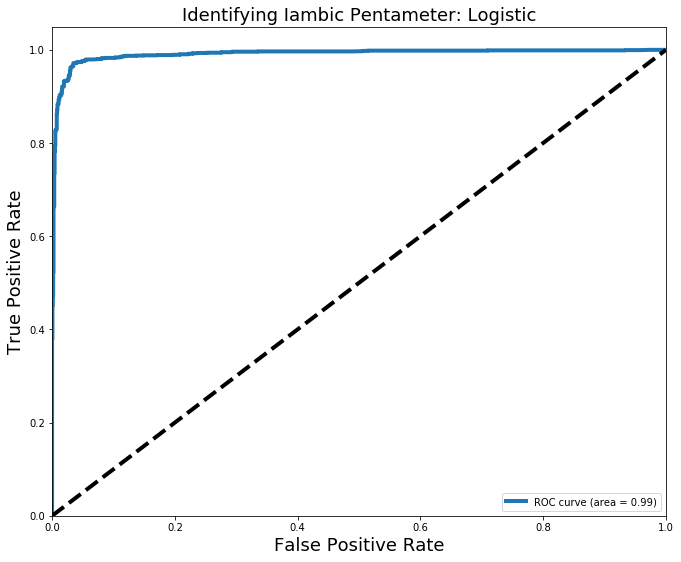

In [34]:
Ytrue = pd.Series(np.ravel(Y))
Y_score = logreg.decision_function(X)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Ytrue, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Identifying Iambic Pentameter: Logistic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [35]:
Ytrue = pd.Series(np.ravel(Y))
Ypred50 = pd.Series(y_pred_50pct)
pd.crosstab(Ytrue, Ypred50, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0.0,1.0,All
True,,,
0.0,1654,51,1705
1.0,68,1724,1792
All,1722,1775,3497
